# Handwritten Character Recognition - Evaluation and Error Analysis

This notebook performs detailed evaluation of the optimized handwritten character recognition model.

The focus is on:
- quantitative performance analysis
- confusion matrix interpretation
- inspection of misclassified samples
- understanding model limitations

In [2]:
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

We load the processed test dataset, PCA transformer, trained model, and label encoder.

In [3]:
X_train, X_test, y_train, y_test = joblib.load("../datasets/processed_emnist_flat.pkl")

best_model = joblib.load("../models/optimized_model.pkl")
pca = joblib.load("../models/pca_transformer.pkl")
label_encoder = joblib.load("../models/label_encoder.pkl")

X_test_pca = pca.transform(X_test)

We generate predictions on the test set and compute detailed performance metrics.

In [4]:
y_pred = best_model.predict(X_test_pca)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       560
           1       0.55      0.70      0.62       560
           2       0.91      0.96      0.93       560
           3       0.91      0.94      0.92       560
           4       0.94      0.92      0.93       560
           5       0.88      0.92      0.90       560
           6       0.94      0.93      0.93       560
           7       0.63      0.59      0.61       560
           8       0.90      0.91      0.90       560
           9       0.93      0.95      0.94       560
          10       0.65      0.65      0.65       560
          11       0.90      0.91      0.91       560
          12       0.88      0.85      0.86       560
          13       0.93      0.94      0.94       560
          14       0.64      0.48      0.55       560
          15       0.96      0.95      0.95       560
          16       0.90      0.94      0.92       560
   

The confusion matrix reveals class-level performance and highlights frequently confused characters.

<Figure size 1200x1200 with 0 Axes>

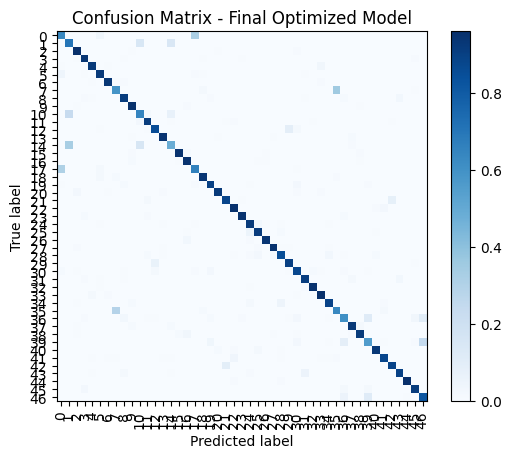

In [5]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(12,12))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", xticks_rotation=90, include_values=False, colorbar=True)
plt.title("Confusion Matrix - Final Optimized Model")
plt.show()

To understand model failures, we visualize misclassified samples.

This helps identify ambiguous characters and overlapping writing styles.

In [6]:
Xc_train, Xc_test, yc_train, yc_test = joblib.load("../datasets/processed_emnist_cnn.pkl")

In [7]:
mis_idx = np.where(y_pred != y_test)[0]
print("Total misclassified samples:", len(mis_idx))

Total misclassified samples: 3782


<Figure size 1000x600 with 0 Axes>

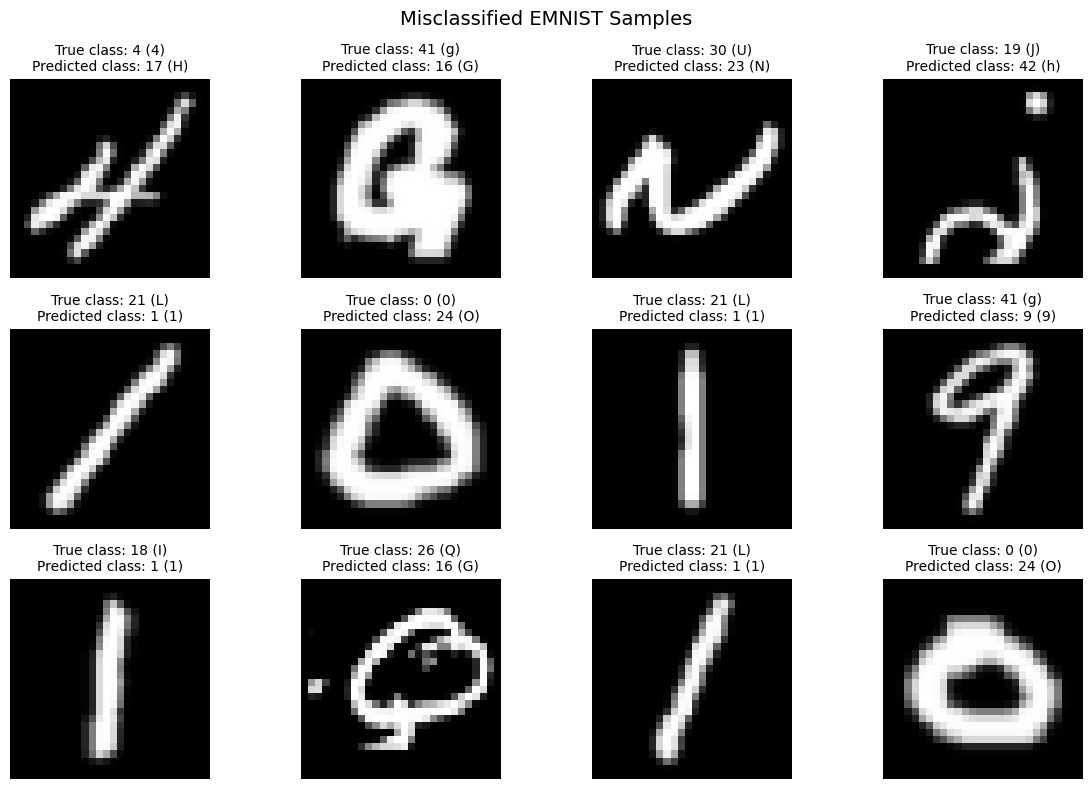

In [13]:
import json
plt.figure(figsize=(10,6))

with open('../datasets/emnist_label_map.json', 'r') as f:
    label_map = json.load(f)

plt.figure(figsize=(12, 8))

for i, idx in enumerate(mis_idx[:12]):
    plt.subplot(3,4,i+1)
    plt.imshow(Xc_test[idx].reshape(28,28), cmap="gray")
    
    true_num = label_encoder.inverse_transform([y_test[idx]])[0]
    pred_num = label_encoder.inverse_transform([y_pred[idx]])[0]
    
    true_char = label_map[str(true_num)]
    pred_char = label_map[str(pred_num)]

    plt.title(f"True class: {true_num} ({true_char})\nPredicted class: {pred_num} ({pred_char})", fontsize=10)
    plt.axis("off")

plt.suptitle("Misclassified EMNIST Samples", fontsize=14)
plt.tight_layout()
plt.show()

Final Conclusions:

- The optimized model achieves strong overall performance on the EMNIST Balanced dataset.
- Most errors occur between visually similar characters such as:
  - O and 0
  - I, l, and 1
  - C and c
  - 4 and H
- Misclassifications often arise from ambiguous handwriting styles rather than clear model failure.

This evaluation confirms that handwritten character recognition is inherently challenging and that model performance is strongly influenced by visual similarity and data quality.

The trained system is now suitable for deployment through an API and web interface.